# Homework 2: Temsillerin / Kararların Birleştirilmesi

Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

# Temsil Nedir? (Text Representation)

Metin verilerini sayısal verilere dönüştürmek için çeşitli yöntemler geliştirilmiştir.

- Bu yöntemler (temsiller), metin verilerini sayısal verilere dönüştürerek, metin verileri üzerinde makine öğrenmesi modellerinin çalıştırılabilmesini sağlar.
- Kullanılan temsil yöntemlerinden bazıları şunlardır:
  - Bag of Words (BoW): Bir önceki ödevde kullanılan **CountVectorizer** bu yöntemi uygular. Her kelimeyi ve frekansını bir vektörde tutar.
  - N-gram
  - TF-IDF: Term Frequency-Inverse Document Frequency
  - Embeddings (Word2Vec, GloVe, FastText, BERT, vb.)
    - Word Embeddings
    - Sentence Embeddings
    - Document Embeddings


# Logger Kullanımı

- Oluşturulan kod içerisinde loglama işlemleri için `logging` kütüphanesi kullanılmıştır.
- Böylelikle geliştirme aşamasında debug için koyulan kodların çıktılarına bakılarak hata ayıklama işlemleri yapılabilir. Bu kodların çıktıları rapor sunulurken kaldırılacaktır.


In [1]:
import logging
import logging.config
import yaml
import textwrap


class CustomFormatter(logging.Formatter):

    def format(self, record):
        wrapped_message = super().format(record)

        # wrap the log messages to 120 characters to better fit the screen
        if (len(wrapped_message) > 120):
            wrapped_message = "\n".join(textwrap.wrap(wrapped_message, width=120))

            # indent the wrapped lines but not the first line
            first_line, rest = wrapped_message.split('\n', 1)
            wrapped_message = first_line + '\n' + textwrap.indent(rest, ' ' * 4) + '\n'

        return wrapped_message


HOMEWORK_DIR = '/Users/ondergormez/Repos/BLM5109_Collective_Learning/02-Homeworks/Homework2/'
LOGGER_CONFIG_FILE = HOMEWORK_DIR + 'logger_config.yaml'

# Load the YAML configuration
with open('logger_config.yaml', 'r') as file:
    config = yaml.safe_load(file.read())
    logging.config.dictConfig(config)

# Apply the custom formatter to the selected handler
logger = logging.getLogger("default_logger")
for handler in logger.handlers:
    if isinstance(handler, logging.StreamHandler):
        handler.setFormatter(CustomFormatter(handler.formatter._fmt, datefmt=handler.formatter.datefmt))

# TODO: Set the log level to INFO
logger.setLevel(logging.DEBUG)


logger.debug("This is a debug message that will be wrapped after 140 characters. " * 10)
logger.info("Logging is configured successfully.")

[DEBUG] [2024-12-03T10:12:58.809Z] This is a debug message that will be wrapped after 140 characters. This is a debug
    message that will be wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters.
    This is a debug message that will be wrapped after 140 characters. This is a debug message that will be wrapped after
    140 characters. This is a debug message that will be wrapped after 140 characters. This is a debug message that will be
    wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters. This is a debug message
    that will be wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters.

[INFO] [2024-12-03T10:12:58.810Z] Logging is configured successfully.


# Sentence Transformers Kullanımı

- Bu ödevde, [sentence-transformers](https://www.sbert.net/) kütüphanesini kullanarak, metin verilerini temsil etmeyi ve bu temsiller üzerinde çeşitli işlemler yapmayı öğreneceğiz.
- Aşağıda listesi verilen sentence transformers lar kullanılacaktır.
- Cosine similarity ile iki metin arasındaki benzerliği hesaplayacağız. Değerin 1'e yakın çıkması iki metin arasındaki benzerliğin yüksek olduğunu gösterir.


## all-MiniLM-L12-v2

https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
sentences = ['That is a happy person', 'That is a very happy person']

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model.encode(sentences)

all_MiniLM_L12_v2_cosine_similarity = cos_sim(embeddings[0], embeddings[1])
logger.info("Cosine similarity between the two sentences: " + str(all_MiniLM_L12_v2_cosine_similarity))

df = pd.DataFrame(columns=['Model Name', 'Cosine Similarity', 'Embedding Shape'])
df.loc[len(df)] = ['all-MiniLM-L12-v2', all_MiniLM_L12_v2_cosine_similarity, embeddings.shape]

logger.info("Shape of the embeddings: " + str(embeddings.shape))
logger.info(embeddings)

/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] [2024-12-03T10:13:12.451Z] Cosine similarity between the two sentences: tensor([[0.9206]])
[INFO] [2024-12-03T10:13:12.455Z] Shape of the embeddings: (2, 384)
[INFO] [2024-12-03T10:13:12.455Z] [[-8.10444951e-02  9.24272686e-02  8.64970088e-02  1.88676696e-02   -5.59543893e-02
    -8.02397579e-02  2.28537410e-01  3.58711407e-02    2.61702184e-02  1.26818772e-02  2.86389831e-02  1.48480048e-03
    -6.02531731e-02 -7.17783719e-02 -3.08933407e-02 -8.82499386e-03    2.72491202e-02 -2.03576460e-02 -1.29113328e-02
    3.74340527e-02   -4.28175479e-02  2.61448696e-02  8.74241367e-02 -1.50004886e-02   -4.75773439e-02  4.27038036e-02
    -2.42109112e-02 -2.14731292e-04    2.29928493e-02  4.57353406e-02 -7.13719651e-02  1.92540400e-02    8.71856585e-02
    -7.07256468e-03 -1.19195886e-01  4.48273011e-02   -3.94753516e-02 -4.89872843e-02  2.50797514e-02  1.08264359e-02
    -3.53915291e-03  1.73944999e-02 -2.60432344e-03  5.29498644e-02    5.35016833e-03 -9.76016372e-02  5.28569445e-02
    -

## gte-large

https://huggingface.co/thenlper/gte-large


In [3]:

model = SentenceTransformer('thenlper/gte-large')
embeddings = model.encode(sentences)

gte_large_cosine_similarity = cos_sim(embeddings[0], embeddings[1])
logger.info("Cosine similarity between the two sentences: " + str(gte_large_cosine_similarity))

df.loc[len(df)] = ['gte-large', gte_large_cosine_similarity, embeddings.shape]

logger.info("Shape of the embeddings: " + str(embeddings.shape))
logger.info(embeddings)

[INFO] [2024-12-03T09:49:03.436Z] Cosine similarity between the two sentences: tensor([[0.9812]])
[INFO] [2024-12-03T09:49:03.438Z] Shape of the embeddings: (2, 1024)
[INFO] [2024-12-03T09:49:03.438Z] [[-0.01598089  0.02115663 -0.01418988 ... -0.00528673 -0.01389631    0.00070975]
    [-0.01099973  0.01510861 -0.01377776 ... -0.01796381 -0.01109363    0.00920461]]



## Multilingual-E5-large-instruct

https://huggingface.co/intfloat/multilingual-e5-large-instruct


In [4]:
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

embeddings = model.encode(sentences)

multilingual_e5_large_instruct_cosine_similarity = cos_sim(embeddings[0], embeddings[1])
logger.info("Cosine similarity between the two sentences: " + str(multilingual_e5_large_instruct_cosine_similarity))

df.loc[len(df)] = ['multilingual-e5-large-instruct', multilingual_e5_large_instruct_cosine_similarity, embeddings.shape]

logger.info("Shape of the embeddings: " + str(embeddings.shape))
logger.info(embeddings)

[INFO] [2024-12-03T09:49:08.649Z] Cosine similarity between the two sentences: tensor([[0.9825]])
[INFO] [2024-12-03T09:49:08.650Z] Shape of the embeddings: (2, 1024)
[INFO] [2024-12-03T09:49:08.651Z] [[ 0.03151183  0.0149784  -0.02529267 ... -0.02180212 -0.04127268    0.02211083]  [
    0.03164333  0.02519069 -0.02216943 ... -0.02840343 -0.04432098    0.02578849]]



# nomic-embed-text-v1

https://huggingface.co/nomic-ai/nomic-embed-text-v1


In [5]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

embeddings = model.encode(sentences)

nomic_embed_text_v1_cosine_similarity = cos_sim(embeddings[0], embeddings[1])
logger.info("Cosine similarity between the two sentences: " + str(nomic_embed_text_v1_cosine_similarity))

df.loc[len(df)] = ['nomic-embed-text-v1', nomic_embed_text_v1_cosine_similarity, embeddings.shape]

logger.info("Shape of the embeddings: " + str(embeddings.shape))
logger.info(embeddings)

/Users/ondergormez/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/eb02ceb48c1fdcc477ff1925c9732c379f0f0d1f/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues rel

[INFO] [2024-12-03T09:49:15.083Z] Cosine similarity between the two sentences: tensor([[0.9538]])
[INFO] [2024-12-03T09:49:15.084Z] Shape of the embeddings: (2, 768)
[INFO] [2024-12-03T09:49:15.085Z] [[ 0.04123023  0.06826035 -0.00916972 ...  0.03575844  0.01540036   -0.00475996]  [
    0.03636549  0.08672782 -0.00809689 ...  0.02911957  0.00933331   -0.02031941]]



# all-mpnet-base-v2

https://huggingface.co/sentence-transformers/all-mpnet-base-v2

- It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.


In [6]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

embeddings = model.encode(sentences)

all_mpnet_base_v2_cosine_similarity = cos_sim(embeddings[0], embeddings[1])
logger.info("Cosine similarity between the two sentences: " + str(all_mpnet_base_v2_cosine_similarity))

df.loc[len(df)] = ['all-mpnet-base-v2', all_mpnet_base_v2_cosine_similarity, embeddings.shape]

logger.info("Shape of the embeddings: " + str(embeddings.shape))
logger.info(embeddings)

[INFO] [2024-12-03T09:49:17.948Z] Cosine similarity between the two sentences: tensor([[0.9666]])
[INFO] [2024-12-03T09:49:17.950Z] Shape of the embeddings: (2, 768)
[INFO] [2024-12-03T09:49:17.950Z] [[-0.02034429 -0.01042639  0.00858659 ... -0.01021324  0.0131486   -0.00532225]
    [-0.0135762   0.00433917  0.00906899 ... -0.01409798  0.02066442   -0.00540235]]



## Temsillere Ait Özet Bilgiler


In [7]:
display(df)

,Model Name,Cosine Similarity,Embedding Shape
0,all-MiniLM-L12-v2,[[tensor(0.9206)]],"(2, 384)"
1,gte-large,[[tensor(0.9812)]],"(2, 1024)"
2,multilingual-e5-large-instruct,[[tensor(0.9825)]],"(2, 1024)"
3,nomic-embed-text-v1,[[tensor(0.9538)]],"(2, 768)"
4,all-mpnet-base-v2,[[tensor(0.9666)]],"(2, 768)"


# Dataset'in Seçimi

https://github.com/selimfirat/bilkent-turkish-writings-dataset/blob/master/data/texts.csv

- Özellikleri her Türkçe 101 ve Türkçe 102 öğrencilerinin yazdığı yazıları içeriyor.
- 6844 yazı var ve 33.1 MB boyutunda.


https://github.com/stefan-it/turkish-bert


STS English dataset.


## A Benchmark Data for Turkish Text Categorization

https://www.kaggle.com/datasets/savasy/ttc4900/data

- Veri seti içerisinde 4900 adet Türkçe metin bulunmaktadır.
- Bu metinler 7 farklı kategoriye ayrılmıştır.
- Çalışmanın yapıldığı klasöre veri seti indirildi.


In [3]:
import pandas as pd

FILE_PATH = HOMEWORK_DIR + '7allV03.csv'

df = pd.read_csv(FILE_PATH, names=['label', 'sentence'], sep=',')

logger.info("Shape of the dataframe: " + str(df.shape))
df.head()

[INFO] [2024-12-03T10:13:27.065Z] Shape of the dataframe: (4901, 2)


,label,sentence
0,category,text
1,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
2,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
3,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
4,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...


# Veri Setinin Dağılımı Hakkında Bilgi Edinilmesi

- Veri setindeki sınıfların dağılımı bize veri setini nasıl parçalara ayıracağımız hakkında önemli bilgiler vermektedir.
- Bu nedenle veri setini inceleyelim ve sınıfların dağılımını bar plot olarak görelim.

## Bar Plot'un Oluşturulması

- Bar plot için aşağıdaki şekilde bir fonksiyon oluşturulmuştır.


In [ ]:
import matplotlib.pyplot as plt


def plot_data_set(data_df, title):

    # Plot a histogram of the acceptance status
    labels = data_df['label'].value_counts()

    total_count = len(data_df)
    value_labels_array = []
    catagory_counts = []
    catagory_percentages_str = []
    for label, count in labels.items():
        logger.info(f"Label: {label}, Count: {count}")
        value_labels_array.append(label)
        catagory_counts.append(count)
        catagory_percentages_str.append(f"{(count / total_count) * 100:.2f}%")

    logger.debug("Total Count: " + str(total_count))
    logger.debug(value_labels_array)
    logger.debug(catagory_counts)
    logger.debug(catagory_percentages_str)

    # Create a bar plot
    plt.figure(figsize=(15, 7))
    bars = plt.bar(range(len(catagory_counts)), catagory_counts)

    # Add value over the bars
    for bar in bars:
        height = bar.get_height()

        # ha: horizontal alignment
        text_x_location = bar.get_x() + bar.get_width() / 2.0
        text_y_location = height + 5

        count_and_text = f"{height} ({catagory_percentages_str.pop(0)})"
        plt.text(text_x_location, text_y_location, count_and_text, ha='center')

    # Add titles and labels
    plt.title(title)
    # add acceptance status to the x-axis
    plt.xticks(range(len(catagory_counts)), value_labels_array)
    plt.xlabel('Acceptance Status')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

[INFO] [2024-12-03T09:49:18.422Z] Label: siyaset , Count: 700
[INFO] [2024-12-03T09:49:18.422Z] Label: dunya , Count: 700
[INFO] [2024-12-03T09:49:18.423Z] Label: ekonomi , Count: 700
[INFO] [2024-12-03T09:49:18.424Z] Label: kultur , Count: 700
[INFO] [2024-12-03T09:49:18.425Z] Label: saglik , Count: 700
[INFO] [2024-12-03T09:49:18.426Z] Label: spor , Count: 700
[INFO] [2024-12-03T09:49:18.426Z] Label: teknoloji , Count: 700
[INFO] [2024-12-03T09:49:18.426Z] Label: category, Count: 1
[DEBUG] [2024-12-03T09:49:18.427Z] Total Count: 4901
[DEBUG] [2024-12-03T09:49:18.427Z] ['siyaset ', 'dunya ', 'ekonomi ', 'kultur ', 'saglik ', 'spor ', 'teknoloji ',
    'category']

[DEBUG] [2024-12-03T09:49:18.427Z] [700, 700, 700, 700, 700, 700, 700, 1]
[DEBUG] [2024-12-03T09:49:18.427Z] ['14.28%', '14.28%', '14.28%', '14.28%', '14.28%', '14.28%', '14.28%', '0.02%']


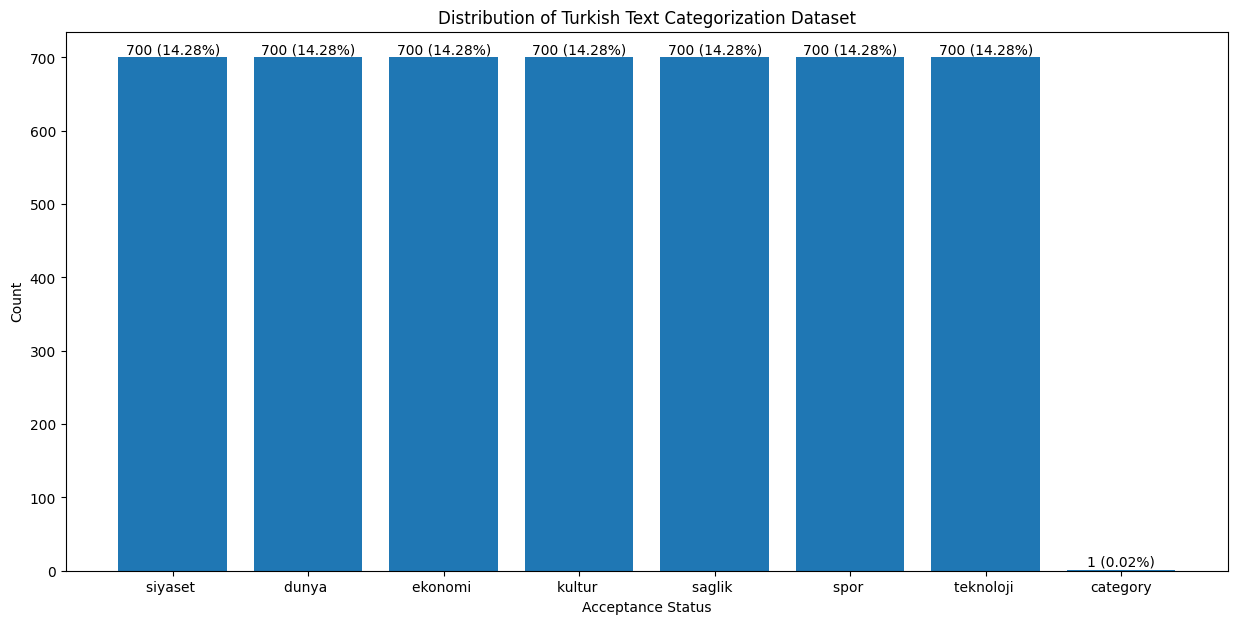

In [10]:
title = "Distribution of Turkish Text Categorization Dataset"
plot_data_set(df, title)

In [11]:
# find label named 'catagory' and print the sentences
category_sentences = df[df['label'] == 'category']['sentence']
logger.info("Sentences with the label 'catagory':")
logger.info(category_sentences)

# drop the rows with the label 'catagory'
df = df[df['label'] != 'category']

logger.info("Shape of the dataframe: " + str(df.shape))
df['label'].value_counts()

[INFO] [2024-12-03T09:49:18.673Z] Sentences with the label 'catagory':
[INFO] [2024-12-03T09:49:18.674Z] 0    text
Name: sentence, dtype: object
[INFO] [2024-12-03T09:49:18.679Z] Shape of the dataframe: (4900, 2)


label
siyaset       700
dunya         700
ekonomi       700
kultur        700
saglik        700
spor          700
teknoloji     700
Name: count, dtype: int64

[INFO] [2024-12-03T09:49:18.692Z] Label: siyaset , Count: 700
[INFO] [2024-12-03T09:49:18.693Z] Label: dunya , Count: 700
[INFO] [2024-12-03T09:49:18.694Z] Label: ekonomi , Count: 700
[INFO] [2024-12-03T09:49:18.694Z] Label: kultur , Count: 700
[INFO] [2024-12-03T09:49:18.695Z] Label: saglik , Count: 700
[INFO] [2024-12-03T09:49:18.695Z] Label: spor , Count: 700
[INFO] [2024-12-03T09:49:18.695Z] Label: teknoloji , Count: 700
[DEBUG] [2024-12-03T09:49:18.696Z] Total Count: 4900
[DEBUG] [2024-12-03T09:49:18.696Z] ['siyaset ', 'dunya ', 'ekonomi ', 'kultur ', 'saglik ', 'spor ', 'teknoloji ']
[DEBUG] [2024-12-03T09:49:18.696Z] [700, 700, 700, 700, 700, 700, 700]
[DEBUG] [2024-12-03T09:49:18.697Z] ['14.29%', '14.29%', '14.29%', '14.29%', '14.29%', '14.29%', '14.29%']


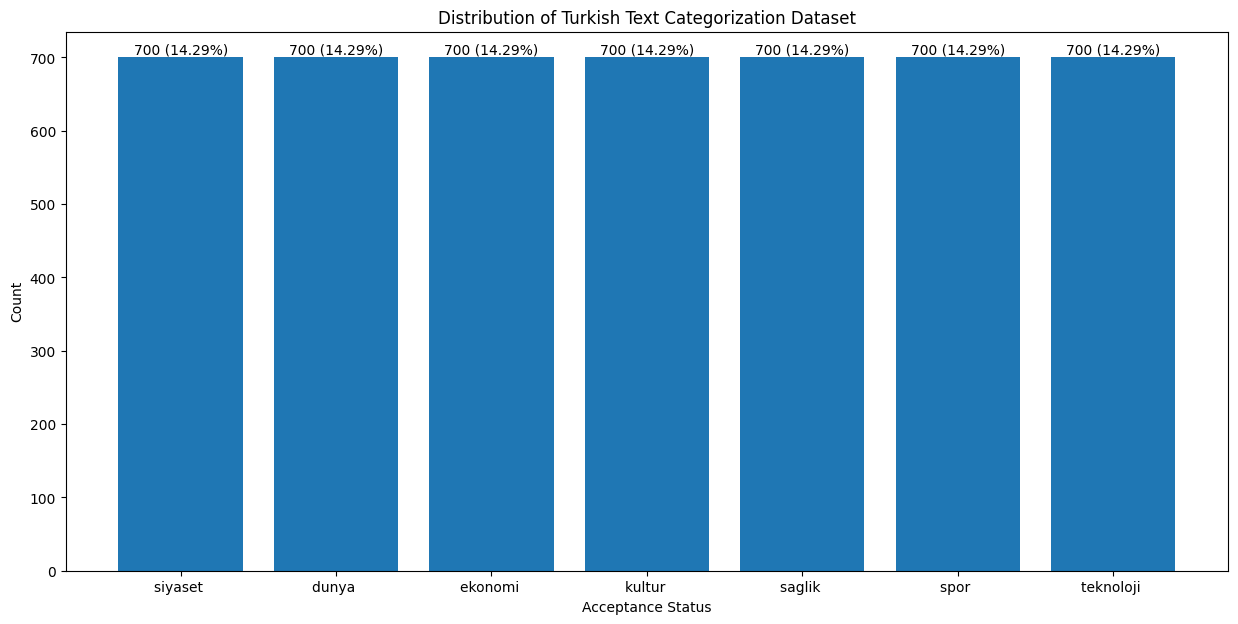

In [12]:
plot_data_set(df, title)

# Support Vector Machines (SVM) Classifier

![SVM](https://miro.medium.com/v2/resize:fit:600/1*Fjj7EblDs2J88GgJmyKL8w.png)


# Random Forest Classifier

- Tek sayı olmasına dikkat etmeliyiz.

![Random Forest Classifier](https://miro.medium.com/v2/resize:fit:1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)


# Multi-Layer Perceptron (MLP) Classifier

![MLP](https://media.geeksforgeeks.org/wp-content/uploads/nodeNeural.jpg)


# Datanın Train ve Test Olarak Ayrılması


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df['sentence']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logger.info("Shape of the training set: " + str(X_train.shape))
logger.info("Shape of the test set: " + str(X_test.shape))

[INFO] [2024-12-03T10:13:54.412Z] Shape of the training set: (3920,)
[INFO] [2024-12-03T10:13:54.413Z] Shape of the test set: (981,)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

embedding_models = {
    # [INFO] [2024-12-03T11:48:21.644Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: SVM
    # [INFO] [2024-12-03T11:48:54.666Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: RF
    # [INFO] [2024-12-03T11:49:19.206Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: MLP
    # Toplam: 2m
    'all-MiniLM-L12-v2': 'sentence-transformers/all-MiniLM-L12-v2',

    # TODO: Train uzun sürüyor
    # 'gte-large': 'thenlper/gte-large',

    # TODO: Train uzun sürüyor
    # [INFO] [2024-12-03T11:55:30.852Z] Training the model with the embedding model: multilingual-e5-large-instruct and classifier: SVM
    # 3m 30s geçmesine rağmen algoritma training i tamamlanmadı
    # 'multilingual-e5-large-instruct': 'intfloat/multilingual-e5-large-instruct',

    # TODO: RuntimeError: Invalid buffer size: 92.42 GB
    # 'nomic-embed-text-v1': 'nomic-ai/nomic-embed-text-v1',

    # [INFO] [2024-12-03T11:39:05.675Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: SVM
    # [INFO] [2024-12-03T11:42:11.428Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: RF
    # [INFO] [2024-12-03T11:44:43.193Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: MLP
    # Toplam: 8m 12s
    'all-mpnet-base-v2': 'sentence-transformers/all-mpnet-base-v2'
}

classifiers = {
    'SVM': SVC(kernel='rbf', probability=True),
    'RF': RandomForestClassifier(n_estimators=100),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50))
}

# Aynı Temsil Yöntemine Ait Sonuçları (5 Adet Ensemble) Birleştirmek


## Demokrasi Usulü ile Karar Birleştirme


In [24]:
def ensemble_voting(y_preds):
    # Example y_preds dimension: (3, 980)

    number_of_predictions = len(y_preds)  # Example: 3
    number_of_samples = len(y_preds[0])  # Example: 980

    y_pred_sum = []
    for i in range(number_of_samples):

        ensemble_predictions = {}
        for j in range(number_of_predictions):
            if y_preds[j][i]not in ensemble_predictions:
                ensemble_predictions[y_preds[j][i]] = 0

            ensemble_predictions[y_preds[j][i]] = ensemble_predictions[y_preds[j][i]] + 1

        max_value = max(ensemble_predictions.values())
        for key, value in ensemble_predictions.items():
            if value == max_value:
                y_pred_sum.append(key)
                break

    return y_pred_sum

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score


# create a data frame for holding the results
results_df = pd.DataFrame(columns=['Embedding Model', 'Classifier',
                          'Train Accuracy', 'Train F1', 'Test Accuracy', 'Test F1'])

for embedding_model_name, embedding_model in embedding_models.items():

    idx = 0

    # Initialize a dictionary to store predictions
    y_train_pred = {}
    y_test_pred = {}

    for classifier_name, classifier in classifiers.items():
        logger.info(f"Training the model with the embedding model: {
                    embedding_model_name} and classifier: {classifier_name}")

        model = SentenceTransformer(embedding_model, trust_remote_code=True)
        embeddings = model.encode(X_train.values)

        classifier.fit(embeddings, y_train)

        y_train_pred[idx] = classifier.predict(embeddings)
        train_accuracy = accuracy_score(y_train, y_train_pred[idx])
        train_f1 = f1_score(y_train, y_train_pred[idx], average='weighted')

        test_embeddings = model.encode(X_test.values)
        y_test_pred[idx] = classifier.predict(test_embeddings)
        test_accuracy = accuracy_score(y_test, y_test_pred[idx])
        test_f1 = f1_score(y_test, y_test_pred[idx], average='weighted')

        results_df.loc[len(results_df)] = [embedding_model_name, classifier_name,
                                           train_accuracy, train_f1, test_accuracy, test_f1]
        idx += 1

    y_train_ensemble_pred = ensemble_voting(y_train_pred)

    train_accuracy = accuracy_score(y_train, y_train_ensemble_pred)
    train_f1 = f1_score(y_train, y_train_ensemble_pred, average='weighted')

    y_test_ensemble_pred = ensemble_voting(y_test_pred)

    test_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
    test_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

    results_df.loc[len(results_df)] = [embedding_model_name, "ensemble_of_tree",
                                       train_accuracy, train_f1, test_accuracy, test_f1]
    display(results_df)

[INFO] [2024-12-03T11:59:38.545Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: SVM
[INFO] [2024-12-03T12:00:09.012Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: RF
[INFO] [2024-12-03T12:00:30.107Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: MLP


/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Embedding Model,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,all-MiniLM-L12-v2,SVM,0.869388,0.869726,0.769623,0.770533
1,all-MiniLM-L12-v2,RF,0.999745,0.999745,0.703364,0.702280
2,all-MiniLM-L12-v2,MLP,0.999490,0.999490,0.731906,0.729676
3,all-MiniLM-L12-v2,ensemble_of_tree,0.999490,0.999490,0.782875,0.782575


[INFO] [2024-12-03T12:00:53.145Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: SVM
[INFO] [2024-12-03T12:03:34.195Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: RF
[INFO] [2024-12-03T12:05:59.741Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: MLP


/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Embedding Model,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,all-MiniLM-L12-v2,SVM,0.869388,0.869726,0.769623,0.770533
1,all-MiniLM-L12-v2,RF,0.999745,0.999745,0.703364,0.702280
2,all-MiniLM-L12-v2,MLP,0.999490,0.999490,0.731906,0.729676
3,all-MiniLM-L12-v2,ensemble_of_tree,0.999490,0.999490,0.782875,0.782575
4,all-mpnet-base-v2,SVM,0.838776,0.839710,0.798165,0.799121
5,all-mpnet-base-v2,RF,0.999745,0.999745,0.754332,0.755068
6,all-mpnet-base-v2,MLP,0.998214,0.998214,0.805301,0.805016
7,all-mpnet-base-v2,ensemble_of_tree,0.998214,0.998213,0.815494,0.816016


# Aynı Algoritmaya Ait Sonuçları (3 Adet Ensemble) Birleştirmek


In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# create a data frame for holding the results
results_df_1 = pd.DataFrame(columns=['Embedding Model', 'Classifier',
                                     'Train Accuracy', 'Train F1', 'Test Accuracy', 'Test F1'])

for classifier_name, classifier in classifiers.items():

    idx = 0

    # Initialize a dictionary to store predictions
    y_train_pred = {}
    y_test_pred = {}

    for embedding_model_name, embedding_model in embedding_models.items():

        logger.info(f"Training the model with the embedding model: {
                    embedding_model_name} and classifier: {classifier_name}")

        model = SentenceTransformer(embedding_model, trust_remote_code=True)
        embeddings = model.encode(X_train.values)

        classifier.fit(embeddings, y_train)

        y_train_pred[idx] = classifier.predict(embeddings)
        train_accuracy = accuracy_score(y_train, y_train_pred[idx])
        train_f1 = f1_score(y_train, y_train_pred[idx], average='weighted')

        test_embeddings = model.encode(X_test.values)
        y_test_pred[idx] = classifier.predict(test_embeddings)
        test_accuracy = accuracy_score(y_test, y_test_pred[idx])
        test_f1 = f1_score(y_test, y_test_pred[idx], average='weighted')

        results_df_1.loc[len(results_df_1)] = [embedding_model_name, classifier_name,
                                               train_accuracy, train_f1, test_accuracy, test_f1]
        idx += 1

    y_train_ensemble_pred = ensemble_voting(y_train_pred)

    train_accuracy = accuracy_score(y_train, y_train_ensemble_pred)
    train_f1 = f1_score(y_train, y_train_ensemble_pred, average='weighted')

    y_test_ensemble_pred = ensemble_voting(y_test_pred)

    test_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
    test_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

    results_df_1.loc[len(results_df_1)] = [embedding_model_name, "ensemble_of_five",
                                           train_accuracy, train_f1, test_accuracy, test_f1]
    display(results_df_1)

[INFO] [2024-12-03T12:08:43.689Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: SVM
[INFO] [2024-12-03T12:09:14.483Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: SVM


,Embedding Model,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,all-MiniLM-L12-v2,SVM,0.869388,0.869726,0.769623,0.770533
1,all-mpnet-base-v2,SVM,0.838776,0.839710,0.798165,0.799121
2,all-mpnet-base-v2,ensemble_of_five,0.869388,0.869726,0.769623,0.770533


[INFO] [2024-12-03T12:11:57.198Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: RF
[INFO] [2024-12-03T12:12:18.968Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: RF


,Embedding Model,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,all-MiniLM-L12-v2,SVM,0.869388,0.869726,0.769623,0.770533
1,all-mpnet-base-v2,SVM,0.838776,0.839710,0.798165,0.799121
2,all-mpnet-base-v2,ensemble_of_five,0.869388,0.869726,0.769623,0.770533
3,all-MiniLM-L12-v2,RF,0.999745,0.999745,0.697248,0.696557
4,all-mpnet-base-v2,RF,0.999745,0.999745,0.748216,0.748914
5,all-mpnet-base-v2,ensemble_of_five,0.999745,0.999745,0.697248,0.696557


[INFO] [2024-12-03T12:14:44.631Z] Training the model with the embedding model: all-MiniLM-L12-v2 and classifier: MLP


/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[INFO] [2024-12-03T12:15:07.905Z] Training the model with the embedding model: all-mpnet-base-v2 and classifier: MLP


/Users/ondergormez/Repos/python_3_12_2_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Embedding Model,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,all-MiniLM-L12-v2,SVM,0.869388,0.869726,0.769623,0.770533
1,all-mpnet-base-v2,SVM,0.838776,0.839710,0.798165,0.799121
2,all-mpnet-base-v2,ensemble_of_five,0.869388,0.869726,0.769623,0.770533
3,all-MiniLM-L12-v2,RF,0.999745,0.999745,0.697248,0.696557
4,all-mpnet-base-v2,RF,0.999745,0.999745,0.748216,0.748914
5,all-mpnet-base-v2,ensemble_of_five,0.999745,0.999745,0.697248,0.696557
6,all-MiniLM-L12-v2,MLP,0.999745,0.999745,0.733945,0.733585
7,all-mpnet-base-v2,MLP,0.999490,0.999490,0.797146,0.797504
8,all-mpnet-base-v2,ensemble_of_five,0.999745,0.999745,0.733945,0.733585


# 15 Sonucu Birleştirmek (1 Ensemble)


# 13 sinifta 42 bin haber metni

http://www.kemik.yildiz.edu.tr/data/File/42bin_haber.rar

TODO: Veriyi incele ve açıkla


# Referanslar

- [From Traditional to Modern: A Comprehensive Guide to Text Representation Techniques in NLP](https://deysusovan93.medium.com/from-traditional-to-modern-a-comprehensive-guide-to-text-representation-techniques-in-nlp-369946f67497)
